<a href="https://colab.research.google.com/github/Cesarppz/practica_python/blob/master/Estimaci%C3%B3n_de_densidad_de_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import pyplot

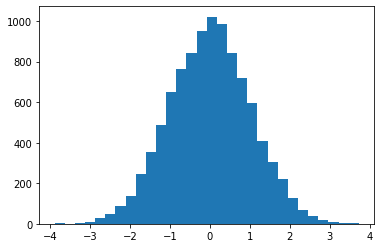

In [6]:
sample = normal(size=10000) #generador
plt.hist(sample,bins=30)
plt.show()

## Estimación paramétrica

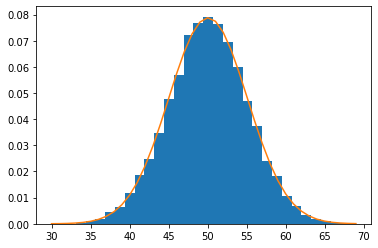

In [27]:
sample = normal(loc=50, scale=5 ,size=10000) #mu= 50, sigma = 5

mu = sample.mean()
sigma = sample.std()
dist= norm(mu,sigma)
values = [value for value in range(30,70)]
probabilidades = [dist.pdf(value) for value in values]

pyplot.hist(sample,bins=30,density=True)
pyplot.plot(values,probabilidades)
pyplot.show()

## Estimación no paramétrica

Kernel Density estimation

[parámetro de suavizado]: smoothing parameter

[función base]: basis function
https://scikit-learn.org/stable/modules/density.html

In [34]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#contruimos una distribución binomial 
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40,scale=5,size=700)
sample = hstack((sample1,sample2)) #Junta las dos destribuciones

model= KernelDensity(bandwidth=2, kernel='gaussian')  #suavdad = bandwidth , tipo de gráfico kernel
sample = sample.reshape(len(sample),1)  #Ajustar la gráfica
model.fit(sample)  #Ajustar los datos que le dimos en model 

KernelDensity(algorithm='auto', atol=0, bandwidth=2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

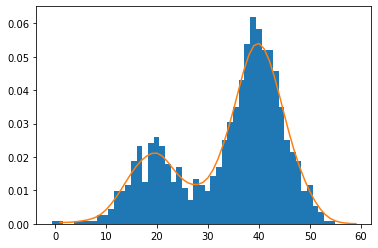

In [39]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()